# Sampling from Beta

https://en.wikipedia.org/wiki/Beta_distribution
https://mathworld.wolfram.com/BetaFunction.html
https://bookdown.org/rdpeng/advstatcomp/rejection-sampling.html

In [ ]:
import numpy as np
from scipy.special import gamma
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
def uniform(x):
    return 1

def Beta(a,b):
    return gamma(a)*gamma(b)/gamma(a+b)

def beta(x, a, b):
    kernel = x**(a-1)*(1-x)**(b-1)
    normalizer = Beta(a,b)
    return kernel/normalizer

def beta_mode(a,b):
    if a>1 and b>1:
        return (a-1)/(a+b-2)
    elif a>1:
        return 1
    elif b>1:
        return 0
    else:
        raise ValueError("Mode not defined on uniform distribution.")

def max_beta(a,b):
    return beta(beta_mode(a,b),a,b)

M=15.224949065227781
Acceptance Ratio: 0.0661


In [ ]:
NUM_SAMPLES = 10000
A = 1.1
B = 20
M = max_beta(A,B)
print(f"{M=}")
samples = []
n_generated = 0

while len(samples) < NUM_SAMPLES:
    n_generated += 1
    x = np.random.uniform(0,1)
    if np.random.uniform(0,1) < 1/M*beta(x, A,B)/uniform(x):
        samples.append(x)
print(f"Acceptance Ratio: {len(samples)/n_generated:.4f}")

/Users/cornelius/anaconda3/envs/general/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


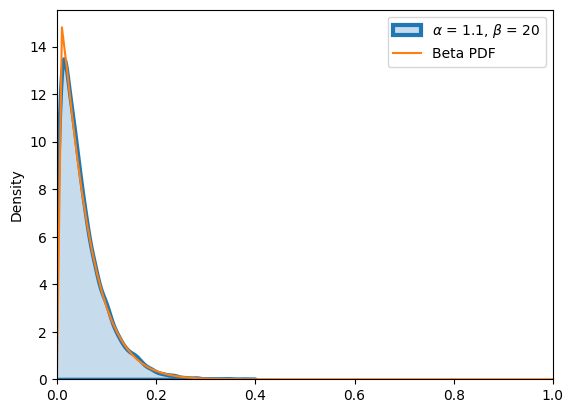

In [30]:
def plot_beta(a,b,sample):
    sns.distplot(sample, hist=False, kde=True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = r'$\alpha$ = {}, $\beta$ = {}'.format(a,b))
    plt.xlim(0, 1)
    sns.lineplot(x=np.linspace(0,1,100), y=beta(np.linspace(0,1,100),a,b), label="Beta PDF")
    plt.show()

plot_beta(A,B,samples)